#### Описание проекта

Область анализа - проводится аналитика сервиса аренды самокатов GoFast.<br/>
Данные - имеются данные о некоторых пользователях из нескольких городов, а также об их поездках.
<br/>
Задача проекта - проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.<br/>
Дополнительная инофрмация - сервис функционирует через мобильное приложение, в котором доступны два тарифа - с подпиской, без подписки:<br/>

без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 88 рублей;
- стоимость старта (начала поездки) — 5050 рублей;

с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 66 рублей;
- стоимость старта — бесплатно.


#### Загрузка данных

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np

##### Считаны CSV-файлы с данными с помощью библиотеки pandas и сохранены в датафреймы.

In [2]:
users=pd.read_csv('')
rides=pd.read_csv('')
sub=pd.read_csv('')

##### Изучена общая информация о каждом датафрейме. Выведены первые 10 строк каждого набора данных.

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [8]:
sub.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Выводы:<br/>
- Датафрейм users включает 5 параметров, параметр user_id может быть использован для объедиения таблиц users и rides. Нет пропусков, все параметры заполнены.<br/>
- Датафрейм rides включает 4 параметра, для параметра date необходимо изменить тип с object на datetime.  Нет пропусков, все параметры заполнены.<br/>
- Датафрейм sub включает 4 параметра, параметр subscription_type может быть использован для объедиения таблиц users и sub. Нет пропусков, все параметры заполнены.

#### Предобработка данных

##### Приведен столбец date к типу даты pandas.

In [9]:
rides['date']=pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

##### Создан новый столбец с номером месяца на основе столбца date.

In [10]:
rides['month']=rides['date'].dt.month
rides['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int64

##### Проверка на наличие пропущенных значений и дубликатов в датафреймах. Обработка.

In [11]:
un=users.isna().sum()
rn=rides.isna().sum()
sn=sub.isna().sum()
print(f'Количество пустых значений в users = {un}, в rides = {rn}, в sub = {sn}')

Количество пустых значений в users = user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64, в rides = user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64, в sub = subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [12]:
users[users['age']==0]# нулевых значений в параметре age нет

,user_id,name,age,city,subscription_type


In [13]:
rides[rides['distance']==0]# нулевых значений в параметре distance нет

,user_id,distance,duration,date,month


In [14]:
rides[rides['duration']==0]# нулевых значений в параметре duration нет

,user_id,distance,duration,date,month


In [15]:
sub[sub['minute_price']==0]# нулевых значений в параметре minute_price нет

,subscription_type,minute_price,start_ride_price,subscription_fee


In [16]:
mask1=(sub['subscription_fee']==0)&(sub['subscription_type']=='ultra')
#нулевая абонентская плата при подписке - отсутствует
sub[mask1]

,subscription_type,minute_price,start_ride_price,subscription_fee


In [17]:
mask2=(sub['start_ride_price']==0)&(sub['subscription_type']=='free')
#нулевая стоимость старта без подписки - отсутствует
sub[mask2]

,subscription_type,minute_price,start_ride_price,subscription_fee


In [18]:
ud=users.duplicated().sum()
rd=rides.duplicated().sum()
sd=sub.duplicated().sum()
print(f'Количество явных дубликатов в users = {ud}, в rides = {rd}, в sub = {sd}')

Количество явных дубликатов в users = 31, в rides = 0, в sub = 0


In [19]:
users[users.duplicated()]# явные дубликаты

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [20]:
users=users.drop_duplicates().reset_index(drop=True)#Удаление явных дубликатов, остаются первые строчки, восстанавливаются индексы
users.duplicated().sum()

0

In [21]:
(users['user_id'].value_counts()>1).sum()#Проверка неявных дубликатов - повторяющихся user_id нет

0

In [22]:
rides.user_id.duplicated().sum()# это нормально, одни и те же люди много раз пользовались прилодением.

16534

Выводы:<br/>
- Пропуски значений во всех файлах, для всех параметров отсутствуют.
- Ошибки типа "нулевая абонентская плата при подписке" и "нулевая стоимость старта без подписки" отсутствуют.
- Явные дубликаты присутствуют только в датафрейме users (31 строчка повторяется полностью). Дубликаты были удалены.
- Неявные дубликаты не найдены.


#### Исследовательский анализ данных

В данной главе описана и визуализирована общая информация о пользователях и поездках.

##### Анализ частоты встречаемости городов

In [23]:
cities=users['city'].value_counts().sort_values(ascending=False)
print(f' Самый часто встречающийся город - {cities.index[0]}, он встречается {cities[0]} раз.\n На втором месте - {cities.index[1]}, {cities[1]} раз.\n На третьем - {cities.index[2]}, {cities[2]} раз.\n Реже всего встречается город - {cities.index[len(cities)-1]}, {cities[len(cities)-1]} раз.')

 Самый часто встречающийся город - Пятигорск, он встречается 219 раз.
 На втором месте - Екатеринбург, 204 раз.
 На третьем - Ростов-на-Дону, 198 раз.
 Реже всего встречается город - Москва, 168 раз.


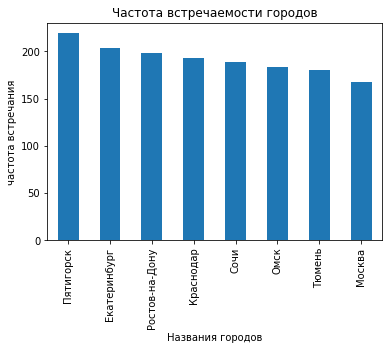

In [24]:
cit=cities.plot(kind='bar', title='Частота встречаемости городов', xlabel='Названия городов', ylabel='частота встречания')

Выводы:<br/>
Найдены самые часто встречаемые и самые редко встречаемые города, данные по городам визуализировны на bar plot, который подходит для визуализации дискретных данных.

##### Анализ соотношения пользователей с подпиской и без подписки

In [25]:
users_free=users[users['subscription_type']=='free']['user_id'].count()
users_ultra=users[users['subscription_type']=='ultra']['user_id'].count()

In [26]:
print(f'Количество пользователей без подписки - {users_free}, количество пользователей с подпиской - {users_ultra}')

Количество пользователей без подписки - 835, количество пользователей с подпиской - 699


In [27]:
((835-699)/((835+699)/2))*100# разница в процентах между людьми с подпиской и без.

17.731421121251632

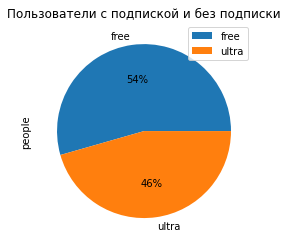

In [28]:
users_pie=pd.DataFrame(data=[[users_free,'free' ], [users_ultra,'ultra']], columns=['people', 'subscription_type'])
up=users_pie.groupby(['subscription_type']).sum().plot(kind='pie', y='people', autopct='%1.0f%%', title='Пользователи с подпиской и без подписки')

Вывод:<br/>
Количество пользователей без подписки больше (56%), чем количество пользователей с подпиской (46%).

##### Анализ возраст пользователей

In [29]:
import matplotlib.pyplot as plt

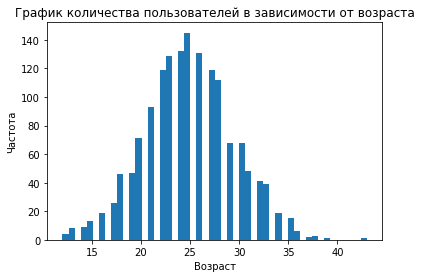

In [30]:
plot1=users['age'].plot(kind='hist', bins=50, title='График количества пользователей в зависимости от возраста')
plot1.set_xlabel("Возраст")
plot1.set_ylabel("Частота");


In [31]:
age_counts=users['age'].value_counts().sort_index()# сортировка по возрасту
age_counts.describe()# Изучение статистических параметров

count     29.000000
mean      52.896552
std       48.824280
min        1.000000
25%        9.000000
50%       41.000000
75%       93.000000
max      145.000000
Name: age, dtype: float64

In [32]:
ages_under_9=age_counts[age_counts<9].index# Выбирано значение 9 как пороговое значение (первый квартиль)
ages_greater_9=age_counts[age_counts>=9].index
print('Для следующих возрастов характерно малое кольчество пользователей:', *ages_under_9)
print('Для следующих возрастов характерно большое кольчество пользователей:', *ages_greater_9)

Для следующих возрастов характерно малое кольчество пользователей: 12 13 36 37 38 39 43
Для следующих возрастов характерно большое кольчество пользователей: 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35


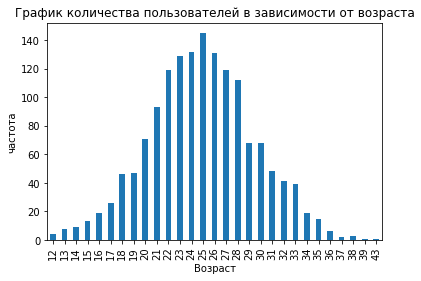

In [33]:
plot2=age_counts.plot(kind='bar', title='График количества пользователей в зависимости от возраста', xlabel='Возраст', ylabel='частота')# построен более наглядный график

Вывод:<br/>
Графики количества пользователей относительно их возраста представлены нормальным распределением, по которому видно, что совсем юнные пользователи (до 14 лет) редко пользуются сервисом, как и пользователи постарше (после 35 лет). Есть определенное поколение, которое является основными пользователями сервиса. Самое большое количество пользователей сервисом имеет возраст 25 лет.


##### Анализ расстояния, которое пользователь преодолел за одну поездку

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

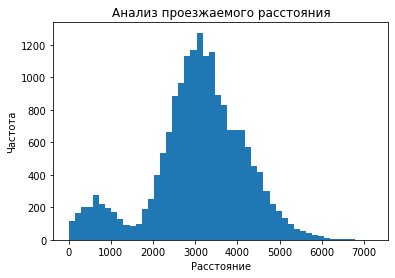

In [34]:
plot3=rides['distance'].plot(kind='hist', bins=50, title="Анализ проезжаемого расстояния")#расстояние является непрерывным значением, удобней всего использовать гистограмму.
plot3.set_xlabel('Расстояние')
plot3.set_ylabel('Частота')
rides['distance'].describe()

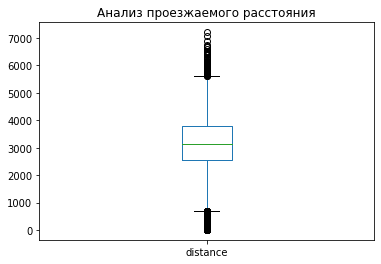

In [35]:
plot4=rides['distance'].plot(kind='box', title='Анализ проезжаемого расстояния')

Вывод:
В среднем пользователи проезжают около трех километров, половина всех польхователей проезжает от 2,5км до 3,7км. Однако есть пользователи, которые проезжают около 6-7 километров, а также те, кто проехали до 0.8метра(те взяли самокат и сразу вернули) до 800 метров. В целом размах данных обольшой.

##### Анализ продолжительности поездок

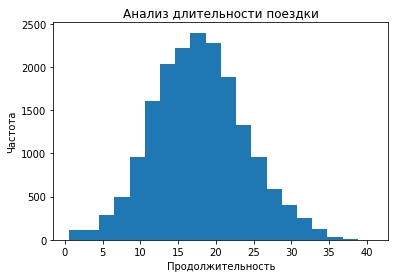

In [36]:
plot5=rides['duration'].plot(kind='hist', bins=20, title='Анализ длительности поездки') 
plot5.set_xlabel('Продолжительность')
plot5.set_ylabel('Частота');


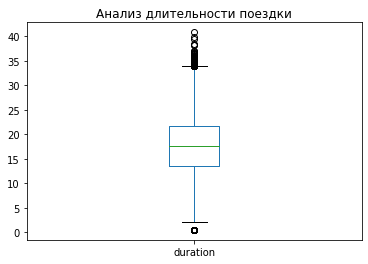

In [37]:
plot6=rides['duration'].plot(kind='box', title='Анализ длительности поездки')

In [38]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

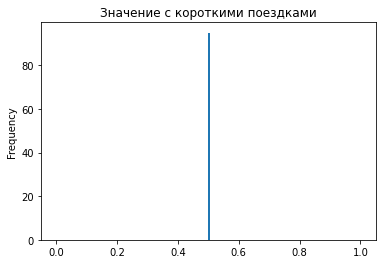

In [39]:
#Проверка слишком коротких поездок
tail_short=rides[rides['duration']<=1]['duration'].plot(kind='hist', bins=200, title='Значение с короткими поездками')

4215    5137.327103
Name: distance, dtype: float64

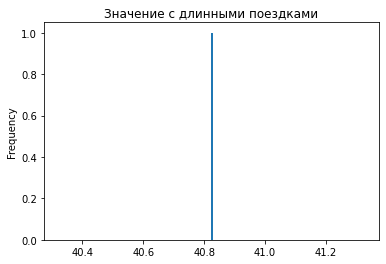

In [40]:
#Проверка слишком длинных поездок
tail_large=rides[rides['duration']>=40]['duration'].plot(kind='hist', bins=200, title='Значение с длинными поездками')
rides[rides['duration']>=40]['distance']#дистанция 4 км

Вывод:
В среднем длительность поездки 17 минут, половина всех пользователей проезжает от 13мин до 21мин. Однако есть пользователи, которые проезжают около 4.1км за 40 минут, а также те, кто проехали меньше минуты. В целом размах данных обольшой.

#### Объединение данных

##### Объединение данных о пользователях, поездках и подписках в один датафрейм методом merge()

In [41]:
# В датафрейму rides более 18000 значений, в то время как в датафрейме users около 1000 значений.
# Встает вопрос, как именно обьединять данные (left, right, inner, outer).
# Я приняла решение обьединять по rides. Так данные не будут потеряны.
merged_users_rides=rides.merge(users, on='user_id', how='left')
merged_users_rides

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra
...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free


In [42]:
merged_all=merged_users_rides.merge(sub, on='subscription_type', how='left')# обьединены все три датафрейма
merged_all

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


##### Создание двух датафреймов: c данными о пользователях без подписки, с данными о пользователях с подпиской.

In [43]:
merged_free=merged_all[merged_all['subscription_type']=='free']
merged_free['subscription_type'].unique()

array(['free'], dtype=object)

In [44]:
merged_free.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
6505,700,4342.002254,22.368009,2021-02-23,2,Айдар,22,Омск,free,8,50,0
6506,700,3798.334905,18.243756,2021-03-03,3,Айдар,22,Омск,free,8,50,0
6507,700,2984.551206,15.424899,2021-04-09,4,Айдар,22,Омск,free,8,50,0
6508,700,3360.107141,16.765497,2021-06-12,6,Айдар,22,Омск,free,8,50,0
6509,700,2567.543847,11.312160,2021-06-23,6,Айдар,22,Омск,free,8,50,0


In [45]:
merged_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  float64       
 2   duration           11568 non-null  float64       
 3   date               11568 non-null  datetime64[ns]
 4   month              11568 non-null  int64         
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  object        
 8   subscription_type  11568 non-null  object        
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [46]:
merged_ultra=merged_all[merged_all['subscription_type']=='ultra']
merged_ultra['subscription_type'].unique()

array(['ultra'], dtype=object)

In [47]:
merged_ultra.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


In [48]:
merged_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   month              6500 non-null   int64         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   object        
 8   subscription_type  6500 non-null   object        
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


In [49]:
11568+6500#проверка длины на всякий случай. 
#Эти два датафрейма - непересекающиеся подмножества множества merged_all. 
#Поэтому сумма их длин равняется длине merged_all. Все верно.

18068

##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

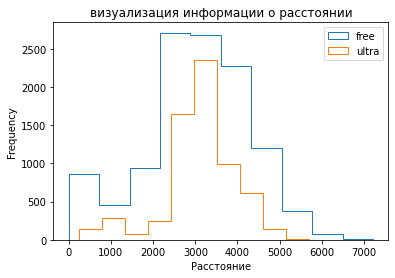

In [50]:
plot_free=merged_free['distance'].plot(kind='hist', histtype='step', title='визуализация информации о расстоянии')
plot_ultra=merged_ultra['distance'].plot(kind='hist', histtype='step')
plot_ultra.set_xlabel('Расстояние')
plt.legend(['free', 'ultra']);

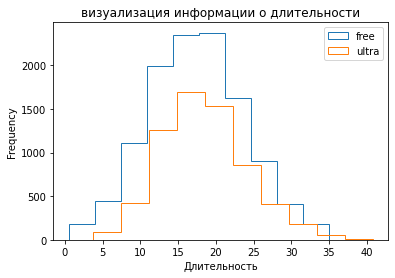

In [51]:
plot_free2=merged_free['duration'].plot(kind='hist', histtype='step', title='визуализация информации о длительности')
plot_ultra2=merged_ultra['duration'].plot(kind='hist', histtype='step')
plot_ultra2.set_xlabel('Длительность')
plt.legend(['free', 'ultra']);

Выводы:<br/>
По данным гистограмм можно сделать вывод, что все распределения в целом стремяться к нормальным. <br/>
Для дистанции и продолжительности поездки у множества людей без подписки больше данных, больше размах, большая частота встречания, однако, в целом, медиана и среднее значения достаточно близки для этих двух множеств.

#### Подсчёт выручки

##### Создание датафрейма с агрегированными данными о поездках

Создание датафрейма с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: нахождение суммарного расстояния, количества поездок и суммарное время для каждого пользователя за каждый месяц.

In [52]:
merged_all.columns

Index(['user_id', 'distance', 'duration', 'date', 'month', 'name', 'age',
       'city', 'subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

In [53]:
merged_all_pivot1=merged_all.pivot_table(index='user_id', columns='month', values='distance', aggfunc='sum').fillna(0)
merged_all_pivot1

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,7027.511294,0.000000,0.000000,754.159807,0.000000,0.000000,0.000000,6723.470560,0.000000,5809.911100,7003.499363,6751.629942
2,0.000000,0.000000,10187.723006,6164.381824,0.000000,3255.338202,6780.722964,923.007439,0.000000,2824.636598,0.000000,3828.248580
3,3061.777147,5421.152016,0.000000,2956.651632,9064.026918,0.000000,10919.595403,0.000000,2891.012822,0.000000,0.000000,2593.381928
4,0.000000,6339.696747,0.000000,0.000000,0.000000,6753.041806,10491.175555,4649.488243,0.000000,13260.762274,3343.025291,0.000000
5,3914.646990,2561.108241,10633.732186,3373.080412,5823.074031,0.000000,3311.974724,2720.817111,0.000000,3218.515955,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,239.330892,2724.331740,6618.024550,9846.644422,7606.452979,2587.068383,0.000000,2237.180181,0.000000,9211.477843,5687.958833,0.000000
1531,711.666072,3022.478610,0.000000,13021.538366,13526.161364,4041.878778,6163.690446,10526.548720,2544.427146,7606.893322,5889.511398,0.000000
1532,2615.477834,0.000000,0.000000,842.097458,303.787850,0.000000,3735.879274,8774.460732,0.000000,2891.115711,8627.494480,6111.889853


In [54]:
merged_all_pivot2=merged_all.pivot_table(index='user_id', columns='month', values='duration', aggfunc='sum').fillna(0)
merged_all_pivot2

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,41.416640,0.000000,0.000000,6.232113,0.000000,0.000000,0.000000,44.776802,0.000000,31.578017,53.397424,27.203912
2,0.000000,0.000000,60.959959,39.048633,0.000000,13.851127,46.170157,6.914760,0.000000,18.779128,0.000000,11.920514
3,12.654443,37.568637,0.000000,20.671364,61.404503,0.000000,65.519784,0.000000,22.390055,0.000000,0.000000,12.984728
4,0.000000,48.150598,0.000000,0.000000,0.000000,43.607518,55.249009,35.896929,0.000000,77.992731,27.666796,0.000000
5,12.395153,11.087710,55.666862,14.904990,31.299780,0.000000,11.948739,17.046260,0.000000,19.724438,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,17.511214,16.859991,27.713398,58.783751,37.495375,16.174137,0.000000,10.836122,0.000000,71.009735,35.983116,0.000000
1531,12.581480,37.712217,0.000000,78.106482,70.163200,27.264021,37.757287,56.751318,20.633281,32.615199,34.607723,0.000000
1532,14.846434,0.000000,0.000000,8.608989,7.792490,0.000000,17.339698,45.644560,0.000000,20.129839,57.669912,40.128222


In [55]:
merged_all_pivot3=merged_all.pivot_table(index='user_id', columns='month', values='date', aggfunc='count').fillna(0)
merged_all_pivot3

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,3.0,2.0
2,0.0,0.0,3.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0
3,1.0,2.0,0.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0
4,0.0,2.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,4.0,2.0,0.0
5,1.0,1.0,3.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,2.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,4.0,2.0,0.0
1531,1.0,2.0,0.0,4.0,4.0,2.0,2.0,3.0,1.0,2.0,2.0,0.0
1532,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,4.0,2.0


##### Внесение данных о помесячной выручке, которую принёс каждый пользователь.

В этот же датафрейм добавлен столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого сделано обращение к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа.

In [56]:
merged_all

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [57]:
merged_all['total_ride_price'] = np.ceil(merged_all.duration)*merged_all.minute_price + merged_all.start_ride_price

In [58]:
merged_all_monthly = merged_all.groupby(['user_id', 'month'], as_index=False).agg({
    'total_ride_price': 'sum',
    'subscription_fee': 'first'
})
merged_all_monthly['total'] = merged_all_monthly.total_ride_price + merged_all_monthly.subscription_fee
merged_all_monthly

,user_id,month,total_ride_price,subscription_fee,total
0,1,1,252.0,199,451.0
1,1,4,42.0,199,241.0
2,1,8,276.0,199,475.0
3,1,10,192.0,199,391.0
4,1,11,336.0,199,535.0
...,...,...,...,...,...
11326,1534,6,308.0,0,308.0
11327,1534,8,484.0,0,484.0
11328,1534,9,234.0,0,234.0
11329,1534,11,824.0,0,824.0


In [59]:
merged_all=merged_all.merge(
    merged_all_monthly[['user_id', 'month', 'total']],
    on=['user_id', 'month'],
    how='left'
)

Вывод<br/>
Построены сводные таблицы, которые позволяют провести аналитику частоты пользования сервисом для разных пользователей. А также посмотреть длительность и дистанцию поездок для каждого пользователя помесячно. Из таблиц видно, что большинство пользователей пользуются сервисом не каждый месяц. Возможно причинами этого являются: время года, личный график и прочее. <br/><br/>
Также, в общую таблицу с данными добавлен столбец о помесячной выручке, которую принес каждый пользователь. Эти таблицы являются хорошей основой для последущего анализа и отвергания/не отвергания выдвинутых гипотез.

#### Проверка гипотез

На данном шаге будут рассмотрены различные гипотезы. Гипотезы помогут понять какие акции необходимо провести, чтобы увеличить количество пользователей с подпиской.

##### Гипотеза 1 - Пользователи с подпиской татят больше времени на поездки. 

In [60]:
from scipy import stats as st
# задан уровень статистической значимости
alpha = 0.05

# проводится ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(merged_ultra['duration'], merged_free['duration'], equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяется p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


Выводы: <br/>
H0 - нулевая гипотеза - пользователи без подписки и с подпиской тратят равное время на поездки, нет "выгодной" категории.<br/>
H1 - альтернативная односторонняя гипотеза - пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
Пользователи с подпиской - 'выгодные'.

Проверена гипотеза с помощью статистического теста. Был использован специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам scipy.stats.ttest_ind(array1, array2, equal_var, alternative). Была сформулирована нулевая и альтернативная односторонняя гипотезы. Был использован уровень статистической значисмости 5% и рассчитан p-value. Параметр, отвечающий за разницу дисперсий equal_var=False. Нулевая гипотеза отвергнута, соответственно можно сказать, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки, нсоответственно, пользователи с подпиской - 'выгодные'. Интересно, что по анализу агрегированных данных сделан другой вывод.

##### Гипотеза 2 - Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.

In [61]:
#H0=mean_distance<=3130
#H1=mean_distance>3130
mean_distance=merged_ultra['distance'].sum()/merged_ultra['user_id'].value_counts().sum()
mean_distance

3115.4453880370247

In [62]:
limit_distance_value = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(merged_ultra['distance'], limit_distance_value, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Выводы<br/>
H0 - нулевая гипотеза предполагает, что среднее расстояние, которое проезжают пользователи с подпиской не превышает 3130 метров.<br/> 
H1 - альтернативна односторонняя, правосторонняя гипотеза - среднее расстояние которые проезжают пользователи с подпиской ultra в среднем за поездку больше 3130 метров.<br/>
По имеющимся данным - гипотеза не отвергнута. Среднее расстояние, которое проезжают пользователи ultra в среднем за одну поездку меньше 3130 метров.  

##### Гипотеза 3 - Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [63]:
#Созданы две выборки: с подпиской, без подписки
array_free=merged_all_monthly[merged_all_monthly['subscription_fee']==0]['total']
array_ultra=merged_all_monthly[merged_all_monthly['subscription_fee']==199]['total']

In [64]:
from scipy import stats as st
# задан уровень статистической значимости
alpha = 0.05

# проводится ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(array_ultra, array_free, equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяется p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


Выводы:<br/> 
H0 - нулевая гипотеза - помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.<br/>  H1 - альтернативная односторонняя гипотеза, правосторонняя "greater" - помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.<br/> 
Нулевая гипотеза о равенстве была отвергнута, соответственно можно говорить о том, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Интересно, что предыдущим анализом это не подтвердилось.

#### Распределения

8.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10%. В этом разделе проведен анализ, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%.

In [65]:
from scipy.stats import binom
n, p = 1161, .1#подобранное число было 1172 (при 100), стало 1161 (при 99)
rv = binom(n, p)

1-rv.cdf(99) #1-вероятность подписки 100 человек

0.9502390990500975

In [66]:
Ns = range(1000, 1500)# автоматический подбор от 1000 до 2000
ps, ns = [], []
p = .1
for i in Ns:
    rv = binom(i, p)
    pp = rv.cdf(99)*100# вероятность успеха для 100 человек
    if pp < 5: break # когда достигнет 5% неуспеха, будет прерван цикл
    ps.append(pp)
    ns.append(i)
    

In [67]:
i# найденное количество человек - это последнее число в списке pp

1161

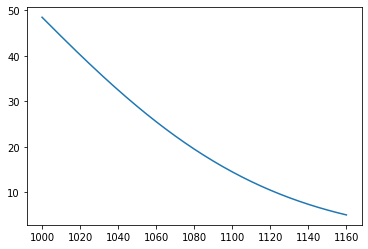

In [68]:
plt.plot(ns, ps); # визуализация

8.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построен примерный график распределения и оценена вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [69]:
p=0.4 #p стремится к 0.5, соответственно, скошенности биномиального распределения не должно быть.
#хорошее условие для апроксимации
n=1000000
n_value_less=399500

In [70]:
#Вычисление матожидания
M=round(n*p)
M

400000

In [71]:
#Вычисление дисперсии
D=round(n*p*(1-p))
D

240000

In [72]:
# перевод в нормальное распределение
mu=M
sigma=D**0.5
from scipy.stats import norm
distr=st.norm(mu, sigma)
result1=distr.ppf(0.4)
result1

399875.885773901

In [73]:
1-distr.cdf(399499)# вероятность, что откроют 399,5 тыс человек или менее равна 84%.

0.8467661502640835

#### Заключение

Описание проекта. В данной главе раскрыты цели проекта, область применения, набор данных и некоторые детали по данным.

Загрузка данных. Данная глава разделяется на две подглавы. В подглаве 2.1 были загружены и считаны 3 CSV файла, в подглаве 2.2 была изучена общая информация и выведены первые строки файлов. Вывод по главе: <br/> 
- Датафрейм users включает 5 параметров, параметр user_id может быть использован для объедиения таблиц users и rides. Нет пропусков, все параметры заполнены.<br/>
- Датафрейм rides включает 4 параметра, для параметра date необходимо изменить тип с object на datetime. Нет пропусков, все параметры заполнены.<br/>
- Датафрейм sub включает 4 параметра, параметр subscription_type может быть использован для объедиения таблиц users и sub. Нет пропусков, все параметры заполнены

Предобработка данных. Глава разделена на 3 подглавы.В подглаве 3.1 Столбец date в файле rides приведен к правильному формату. В подглаве 3.2 создан столбец с месяцами. В главе 3.3 данные были изучены на предмет дубликатов. Выводы по главе:<br/>
- Пропуски значений во всех файлах, для всех параметров отсутствуют.
- Ошибки типа "нулевая абонентская плата при подписке" и "нулевая стоимость старта без подписки" отсутствуют.
- Явные дубликаты присутствуют только в датафрейме users (31 строчка повторяется полностью). - Дубликаты были удалены.
- Неявные дубликаты не найдены.

Исследовательский анализ данных. Глава разделена на 5 подглав. 
 - В подглаве 4.1 проведен анализ частоты встречаемости городов. Выявлены самые популярные и непопулярные города.
 - В подглаве 4.2 Выполнен анализ соотношения пользователей с подпиской и без подписки. Без подписки пользователей больше (примерно на 17%), чем с подпиской.
 - В подглаве 4.3 Проведен анализ возраста пользователей и выделена возрастная группа, которая является самой активной (14-35 лет).
 - В подглаве 4.4 проведен анализ расстояний, которые преодолевали пользователи (среднее 3км), в подглаве 4.5 проведен анализ длительности поездок (среднее 18 минут).

Объединение данных. В данной главе 3 подглавы.
 - В подглаве 5.1 все файлы были объеденены в единый датафрейм merged_all. 
 - В подглаве 5.2 были созданы 2 датафрейма: с подпиской и без. 
 - В подглаве 5.3 визуализированны данные о поездках(длительность и расстояние) для пользователей с подпиской и без.

Подсчет выручки. Глава разделена на две подглавы. 
 - В подглаве 6.1 создан датафрейм с агрегированными данными о поездках. 
 - В подглаве 6.2 в датасет merged_all внесены данные о помесячной выручке от каждого пользователя.

Проверка гипотез. Глава состоит из 4 подглав, каждая из которых относится к определенной гипотезе:<br/>
 - Гипотеза 1 - Пользователи с подпиской тратят больше времени на поездки - не отвергнута
 - Гипотеза 2 - Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров - не отвергнута
 - Гипотеза 3 - Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки - отвергнута

Распределения. В главе решены статистические задачи.